In [ ]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#data loading 
data = pd.read_csv("D:\Cosmic\MENTORSHIP_WORK\PythonWeekly_Projects\Week8_Project\spam-classifier\data\spam.csv", encoding="latin-1")
data.head()
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Yoogy Srinivash\AppData\Local\Temp\ipykernel_7740\1688612449.py:1: SyntaxWarning: invalid escape sequence '\C'
  data = pd.read_csv("D:\Cosmic\MENTORSHIP_WORK\PythonWeekly_Projects\Week8_Project\spam-classifier\data\spam.csv", encoding="latin-1")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


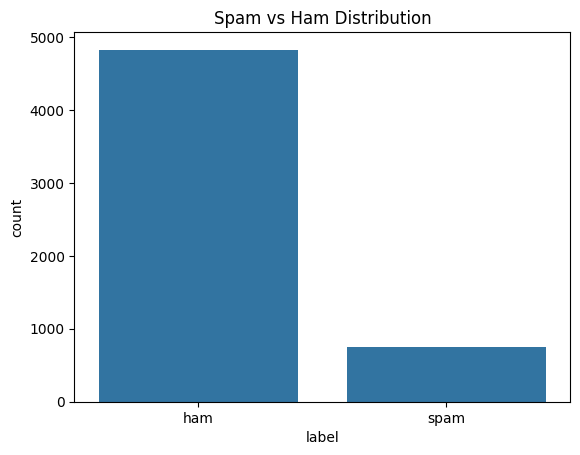

In [37]:
data.shape
data.info()

data['label'].value_counts()

sns.countplot(x='label', data=data)
plt.title("Spam vs Ham Distribution")
plt.show()

In [ ]:
#preprocessing

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['label_num'] = encoder.fit_transform(data['label'])

tfidf = TfidfVectorizer(
    max_features=3000,
    stop_words='english'
)

X = tfidf.fit_transform(data['message'])
y = data['label_num']

In [ ]:

#test train split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
#model training 

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

dt.fit(X_train, y_train)

Logistic Regression Accuracy: 0.9551569506726457
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.69      0.80       150

    accuracy                           0.96      1115
   macro avg       0.96      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115

Naive Bayes Accuracy: 0.9802690582959641
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



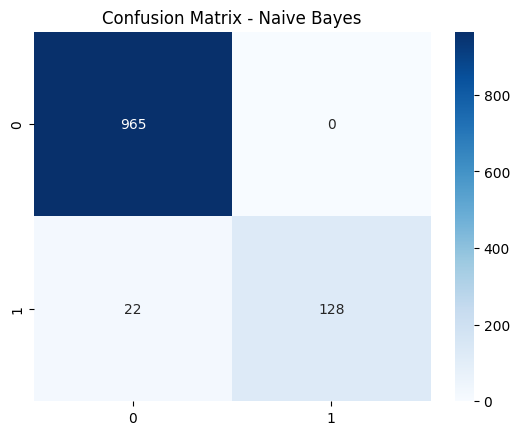

In [ ]:
#evaluation

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

sns.heatmap(confusion_matrix(y_test, y_pred_nb),
            annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

In [42]:
#saving the models 

joblib.dump(lr, "../models/spam_lr_model.pkl")
joblib.dump(nb, "../models/spam_nb_model.pkl")

['../models/spam_nb_model.pkl']